In [5]:
from set_eye_tracking_cooking_recipes.entities.test import Test
from set_eye_tracking_cooking_recipes.entities.test_data import TestData
from set_eye_tracking_cooking_recipes.entities.test_person import TestPerson
from set_eye_tracking_cooking_recipes.entities.test_aoi_metrics import TestAoiMetrics

TestAoiMetrics_0 = TestAoiMetrics(file_path="../data/set_eye_tracking_cooking_recipes_Metrics.tsv",id=0, Testperson="Christoph_Haerdl")
TestData_0 = TestData(file_path="../data/test_data/0_Christoph_Haerdl.tsv")
TestPerson_0 = TestPerson(surveys_file_path="../data/surveys.csv", id=0)
Test_0 = Test(test_person=TestPerson_0,test_data=TestData_0, test_aoimetrics= TestAoiMetrics_0)



D:\Git\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:44: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


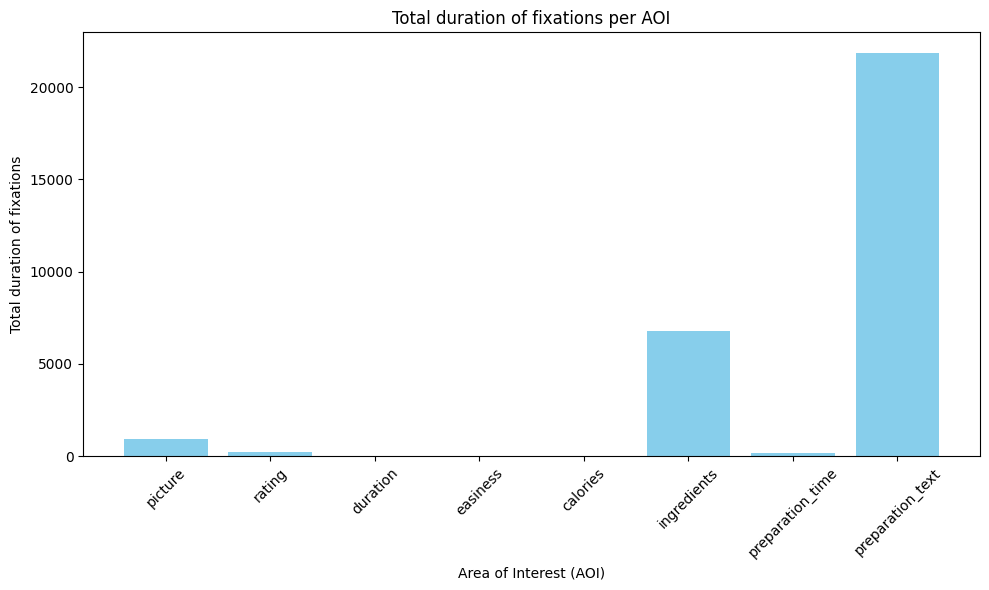

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# Definition der Reihenfolge der AOIs
aoi_labels = ['picture', 'rating', 'duration', 'easiness', 'calories', 'ingredients', 'preparation_time', 'preparation_text']

# Erstellen eines DataFrame aus den geordneten Daten und den entsprechenden Labels
df = pd.DataFrame({'Total_duration_of_fixations': Test_0.test_aoimetrics.aois_semmeln_total_duration_of_fixations}, index=aoi_labels)

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Total_duration_of_fixations'], color='skyblue')
plt.xlabel('Area of Interest (AOI)')
plt.ylabel('Total duration of fixations')
plt.title('Total duration of fixations per AOI')
plt.xticks(rotation=45)  # Rotieren der Beschriftungen für bessere Lesbarkeit
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

In [2]:
# Create a mask to filter out None values
mask = ~(np.isnan(test_data.gaze_point_x) | np.isnan(test_data.gaze_point_y))

# Create a DataFrame
df = pd.DataFrame({'timestamp': test_data.recording_timestamp[mask], 'X': test_data.gaze_point_x[mask], 'Y': test_data.gaze_point_y[mask]})

       timestamp       X      Y
0         291191  1023.0  640.0
1         294525  1002.0  649.0
2         297859  1006.0  650.0
3         301193  1009.0  663.0
4         304529  1007.0  663.0
...          ...     ...    ...
48194   82608702   595.0  499.0
48195   82612035   594.0  499.0
48196   82615369   595.0  502.0
48197   82618702   595.0  501.0
48198   82622035   595.0  502.0

[48199 rows x 3 columns]


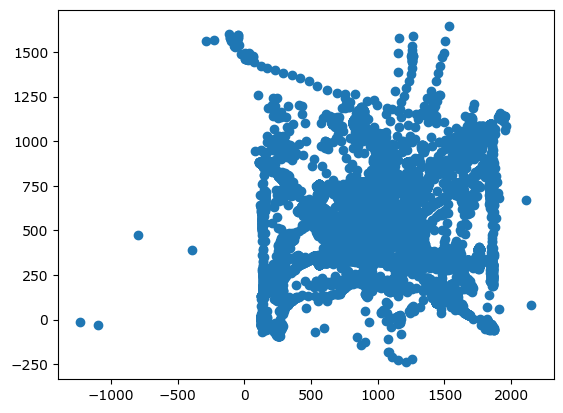

In [3]:
print(df)
# Plot the points
plt.scatter(df['X'], df['Y'], marker='o', label='Data Points')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


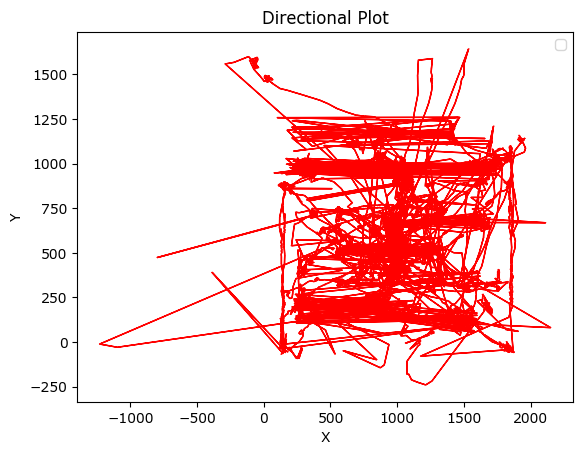

In [4]:
# Plot the direction arrows
for i in range(1, len(df)):
    plt.arrow(df['X'].iloc[i-1], df['Y'].iloc[i-1], df['X'].iloc[i] - df['X'].iloc[i-1], df['Y'].iloc[i] - df['Y'].iloc[i-1],
              head_width=0.2, head_length=0.2, fc='red', ec='red')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Directional Plot')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from set_eye_tracking_cooking_recipes.entities.test_data import AoiIndexes

aoi_sequences, aoi_total_fixation_times = test_classes[5].test_data.get_aoi_times()

colors = {
    AoiIndexes.picture.value: 'red',
    AoiIndexes.rating.value: 'brown',
    AoiIndexes.duration.value: 'grey',
    AoiIndexes.easiness.value: 'green',
    AoiIndexes.calories.value: 'orange',
    AoiIndexes.ingredients.value: 'purple',
    AoiIndexes.preparation_time.value: 'yellow',
    AoiIndexes.preparation_text.value: 'skyblue'
}

colors_for_legend = {
    AoiIndexes.picture.name: 'red',
    AoiIndexes.rating.name: 'blue',
    AoiIndexes.duration.name: 'grey',
    AoiIndexes.easiness.name: 'green',
    AoiIndexes.calories.name: 'orange',
    AoiIndexes.ingredients.name: 'purple',
    AoiIndexes.preparation_time.name: 'yellow',
    AoiIndexes.preparation_text.name: 'skyblue'
}

# Liste mit Lebensmittelnamen
liste_slides = [
    "semmeln",
    "schweinebraten",
    "hawai",
    "indi_curry",
    "chilli",
    "glasnudeln",
    "gratine",
    "spaghettis",
    "arab_pizza",
    "hack"
]

num_plots = len(aoi_sequences)

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 3*num_plots))

for i, (data, ax) in enumerate(zip(aoi_sequences, axes)):
    base_position = 0
    for color, length in data:
        ax.barh(0, length, left=base_position, color=colors[color], height=1)
        base_position += length
    max_length = max(sum(item[1] for item in sublist) for sublist in aoi_sequences)
    ax.set_xlim(0, max_length)  
    # Text neben jedem Subplot hinzufügen
    ax.text(-0.1, 0.5, f"{liste_slides[i]}", va='center', ha='center', rotation=90, transform=ax.transAxes)

    ax.set_yticks([])

legend_labels = [f"{key}" for key, value in colors_for_legend.items()]
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[key]) for key in colors],
           labels=legend_labels,
           loc='upper right', 
           fontsize='small', 
           title='Color Legend')

plt.tight_layout()
plt.show()